In [1]:
import pandas as pd
from IPython.display import Image, display
import base64

api_key = '6669d7a6eb70f4.27564131'

# be careful with stocks like TSLA doesn't have dividends and will still a top 5 market cap spot, without generating any data
#tickers = ['NESN.SW', 'UL.US', 'MDLZ.US', 'CMG.US', 'KHC.US', 'GIS.US', 'HSY.US', 'SYY.US', 'KHC.US']  
#tickers = ['MSFT.US','AAPL.US','AMZN.US','CB.US','INTC.US','AMD.US'] 

# Top 10 S&P 500, excluding BRK-B.US which doesn't pay dividends 
# AAPL.US,MSFT.US,NVDA.US,AMZN.US,META.US,GOOGL.US,GOOG.US,LLY.US,JPM.US
tickers = ['AAPL.US','MSFT.US','NVDA.US','AMZN.US','META.US','GOOGL.US','GOOG.US','LLY.US','JPM.US']
tickers = ['AAPL.US','MSFT.US','abcdefg33']#,'MSFT.US','NVDA.US','AMZN.US','META.US','GOOGL.US','GOOG.US','LLY.US','JPM.US']

# top S&P500 companies that have paid dividends since at least 2023
# (BRBK, AMZN,TSLA don't pay dividends, and GOOG, GOOL, NVDA, META only just started)
# AAPL.US,MSFT.US,LLY.US,JPM.US,AVGO.US,UNH.US,V.US,PG.US,JNJ.US,NVDA.US,AMZN.US,GOOG.US,GOOGL.US,META.US
#tickers = ['NVDA.US','AAPL.US','MSFT.US','LLY.US','JPM.US','AVGO.US','UNH.US','V.US','PG.US','JNJ.US','AMZN.US','GOOG.US','GOOGL.US','META.US']

# Constants for the number of days before earnings and after dividend
days_after_dividend = 0  # Number of days after the dividend to buy
days_before_earnings = 0  # Number of days before earnings to sell

# Define the period of analysis
start_date = '2019-09-09'
end_date = '2024-09-09'

# Initial nominal investment in each stock
initial_investment = 1000

import download_info as di

downloaded_data = di.download_data(api_key, tickers, start_date, end_date)



Fetching data for AAPL.US...
<Response [200]>   https://eodhd.com/api/eod/AAPL.US?from=2019-09-09&to=2024-09-09&api_token=6669d7a6eb70f4.27564131&fmt=json
<Response [200]>   https://eodhd.com/api/calendar/earnings?api_token=6669d7a6eb70f4.27564131&from=2019-09-09&to=2024-09-09&symbols=AAPL.US
Earnings Dates for AAPL.US: 2019-10-30, 2020-01-28, 2020-04-30, 2020-07-30, 2020-10-29, 2021-01-27, 2021-04-28, 2021-07-27, 2021-10-28, 2022-01-27, 2022-04-28, 2022-07-28, 2022-10-27, 2023-02-02, 2023-05-04, 2023-08-03, 2023-11-02, 2024-02-01, 2024-05-02, 2024-08-01
<Response [200]>   https://eodhd.com/api/div/AAPL.US?from=2019-09-09&to=2024-09-09&api_token=6669d7a6eb70f4.27564131&fmt=json
Dividend Dates for AAPL.US: 2019-11-07, 2020-02-07, 2020-05-08, 2020-08-07, 2020-11-06, 2021-02-05, 2021-05-07, 2021-08-06, 2021-11-05, 2022-02-04, 2022-05-06, 2022-08-05, 2022-11-04, 2023-02-10, 2023-05-12, 2023-08-11, 2023-11-10, 2024-02-09, 2024-05-10, 2024-08-12
<Response [200]>   https://eodhd.com/api/hist

ValueError: too many values to unpack (expected 2)

AttributeError: 'str' object has no attribute 'items'

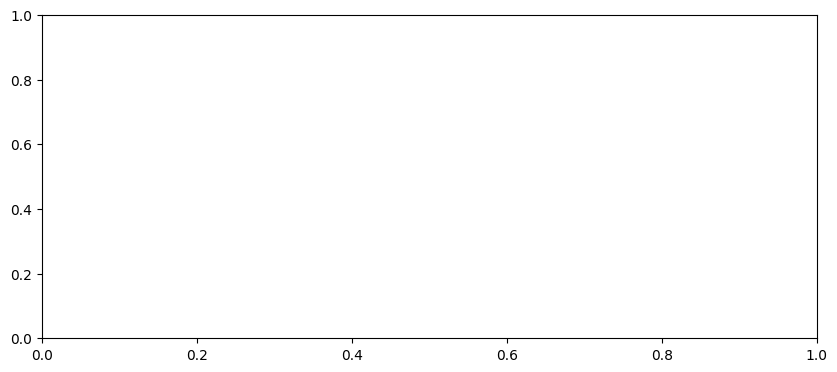

In [2]:
import chart_available_dates as cad
base64_image = cad.plot_stock_date_ranges(downloaded_data)
display(Image(data=base64.b64decode(base64_image), format='png'))

In [3]:
import food_stock_strategy_simulation as fss
market_caps = fss.process_market_caps(downloaded_data)
top_stocks_by_date = fss.create_top_stocks_by_date(market_caps, start_date, end_date, 5)

AttributeError: 'str' object has no attribute 'items'

c:\Dev\Finance\Food stock strategy simulation\chart_top_stocks.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Stocks', bbox_to_anchor=(1.05, 1), loc='upper left')


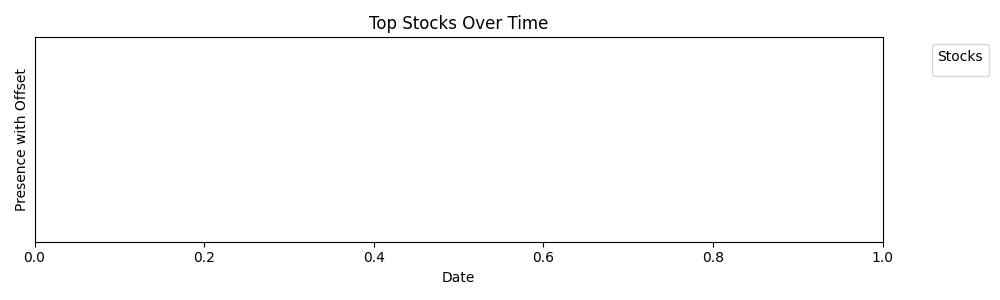

In [4]:
import chart_top_stocks as cts
plot_top_stocks_base64 = cts.chart_top_stocks(top_stocks_by_date)
display(Image(data=base64.b64decode(plot_top_stocks_base64), format='png'))

In [ ]:
import food_stock_strategy_simulation as fss
investment_results = fss.process(downloaded_data, top_stocks_by_date, days_after_dividend, days_before_earnings, initial_investment)

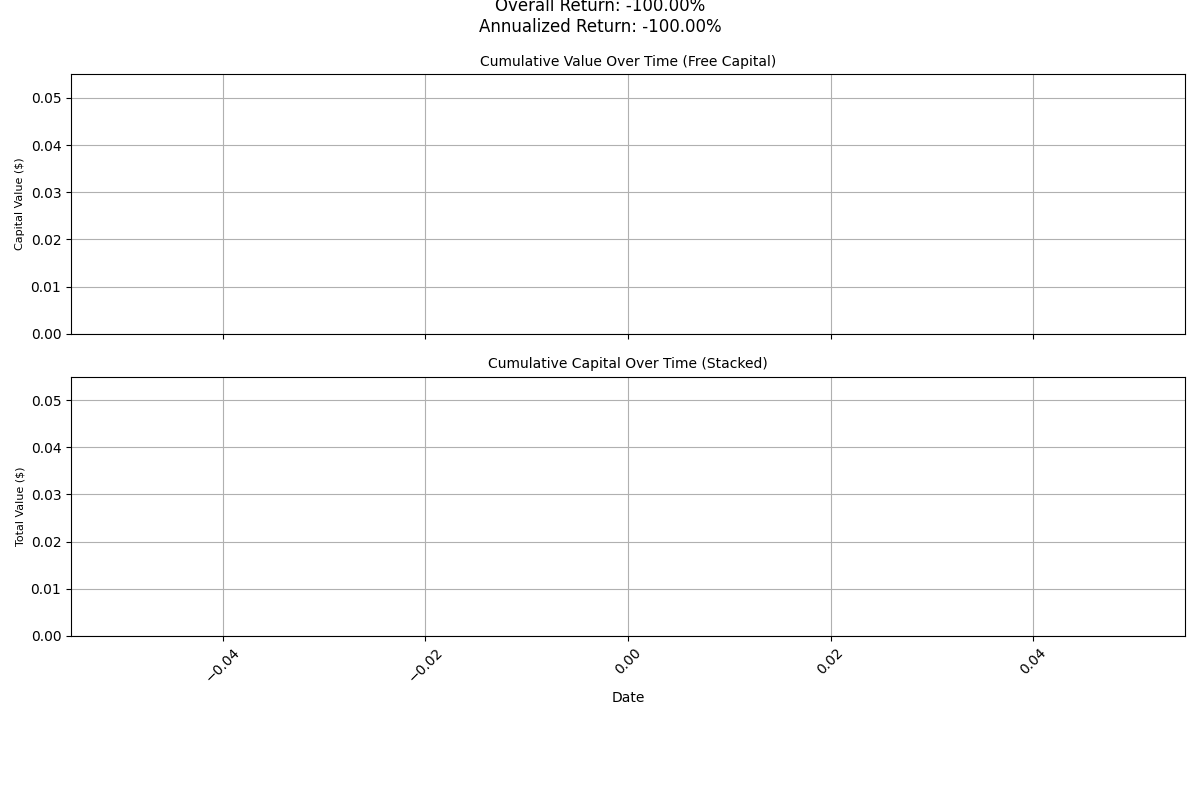

In [6]:
import chart_combined as cc
base64_image = cc.chart_combined(investment_results, start_date, end_date)
display(Image(data=base64.b64decode(base64_image), format='png'))